# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



### PS1.1-1 Answer:

Probablity of landing head : P(H) = 0.7 

Probability of landing tails : P(T) = 0.3 

"m" : Number of times the Coin was flipped. 

So, here’s how I tackled it:

The entropy of H of a random variable can be calculated with this formula:
H(X) = -(0.7log2 0.7 + 0.3 log2 0.3) which gives us .881 bits. 
The reason this value is less than 1 bit is because the outcome of the coin flips are not equally likely. Since the probablity of getting heads is higher, 0.7, than tails, (0.3), which is why the results is bound to have a lower entropy than that of a fair coin and in that case it would be exactly 1 bit. 


#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

In [9]:
!pip install numpy
!pip install matplotlib
!pip install scipy

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/45.8 MB 14.2 MB/s eta 0:00:04
   - -------------------------------------- 1.5/45.8 MB 15.7 MB/s eta 0:00:03
   -- ------------------------------------- 3.0/45.8 MB 23.8 MB/s eta 0:00:02
   ---- ----------------------------------- 5.2/45.8 MB 29.9 MB/s eta 0:00:02
   ------ --------------------------------- 7.7/45.8 MB 37.7 MB/s eta 0:00:02
   -------- ------------------------------- 10.2/45.8 MB 43.5 MB/s eta 0:00:01
   ----------- ---------------------------- 12.8/45.8 MB 65.6 MB/s eta 0:00:01
   ------------- -------------------------- 15.5/45.8 MB 73.1 MB/s eta 0:00:01
   --------------- ------------------------ 18.2/45.8 MB 81.8 MB/s eta 

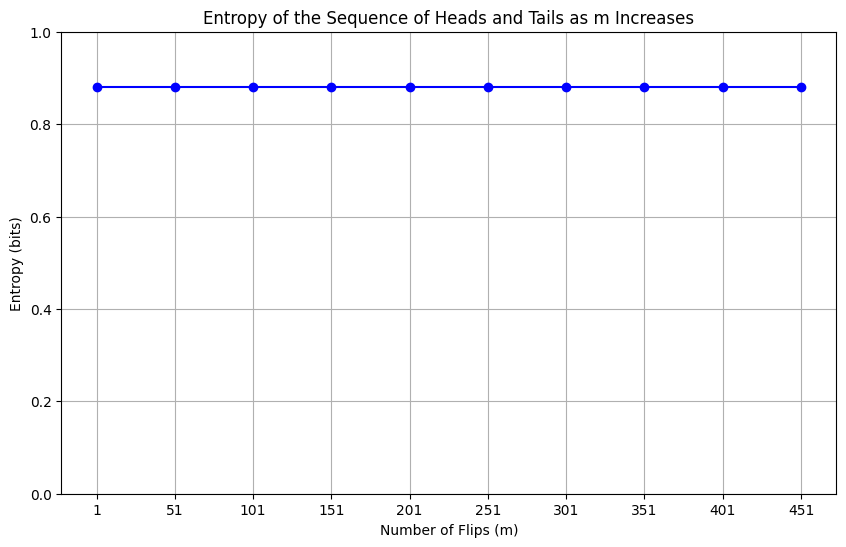

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

p_head = 0.7
p_tail = 0.3

entropy = -(p_head * math.log2(p_head) + p_tail * math.log2(p_tail))

m_values = np.arange(1, 501, 50)

entropy_values = [entropy] * len(m_values)

plt.figure(figsize=(10, 6))
plt.plot(m_values, entropy_values, marker='o', linestyle='-', color='blue')
plt.title('Entropy of the Sequence of Heads and Tails as m Increases')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Entropy (bits)')
plt.grid(True)
plt.xticks(m_values)
plt.ylim(0, 1)  
plt.show()


#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



### Answer for PS1.1-3

Focusing on applying Bayesian learning to estimate the probability of a coin landing heads. With Beta distribution as our prior and updating it with observed data, we can aim to refine our estimation of the coin's bias.

Series of obsevrations (m) of coin flips, where the outcome is heads. We update the prior for each observation to create a posterior distribution.
The mean and vairance of the posterior distribution is calculated for our updated idea about the probability of heads. 

Basically the code is to simulate the Bayesian update process for the series of coin flips on the different number of trials corresponding to it. 

Below is the code implementation:

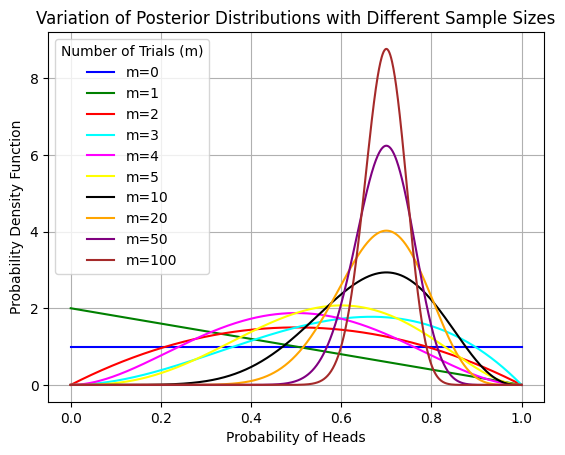

m	Mean	Variance
0	0.5000	0.0833
1	0.3333	0.0556
2	0.5000	0.0500
3	0.6000	0.0400
4	0.5000	0.0357
5	0.5714	0.0306
10	0.6667	0.0171
20	0.6818	0.0094
50	0.6923	0.0040
100	0.6961	0.0021


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# simulate the experiment and update the posterior distribution
def simulate_experiment(m_values, alpha_prior, beta_prior, bias=0.7):
    """
    Simulate coin flips and update posterior distribution for a list of trials (m_values).
    
    Parameters & Return Variables. 

    Parameter Variables: 
    - m_values: List of ints, for number of coin flips.
    - alpha_prior, beta_prior: Prior distribution parameters for the beta distribution.
    - bias: P(head)
    
    Return Variables:
    - mean_list: List of posterior means.
    - variance_list: List of posterior variances.
    - posterior_params: List of tuples containing the alpha and beta parameters for each posterior.
    """
    mean_list, variance_list, posterior_params = [], [], []

    for m in m_values:
        heads = int(bias * m)
        tails = m - heads
        
        # Update the posterior parameters based on the results
        alpha_posterior, beta_posterior = alpha_prior + heads, beta_prior + tails
        posterior_params.append((alpha_posterior, beta_posterior))
        
        # Calculate and append the mean and variance for the posterior distribution
        mean_list.append(alpha_posterior / (alpha_posterior + beta_posterior))
        variance_list.append((alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior) ** 2 * (alpha_posterior + beta_posterior + 1)))

    return mean_list, variance_list, posterior_params

def plot_posterior_distributions(m_values, posterior_params):
    """
    Plot the posterior probability distributions.

    Parameters & Return Variables. 
    
    Parameter Variables: 
    - m_values: List of ints, for number of coin flips.
    - posterior_params: List of tuples containing the alpha and beta parameters for each posterior.

    Return Variables:
    None.    

    """
    x = np.linspace(0, 1, 1000)
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
    
    for (m, params), color in zip(zip(m_values, posterior_params), colors):
        plt.plot(x, beta.pdf(x, *params), label=f'm={m}', color=color)
    
    plt.xlabel('Probability of Heads')
    plt.ylabel('Probability Density Function')
    plt.title('Variation of Posterior Distributions with Different Sample Sizes')
    plt.legend(title='Number of Trials (m)', loc='upper left')
    plt.grid(True)
    plt.show()


def print_summary_table(m_values, mean_list, variance_list):
    """
    Tabulating the mean and variance for each trial

    Parameters & Return Variables. 
    
    Parameter Variables: 
    - m_values: List of ints, for number of coin flips.
    - mean_list: List of posterior means.
    - variance_list: List of posterior variances.
    
    Return Variables:
    None.
    """
    print("m\tMean\tVariance")
    for m, mean, variance in zip(m_values, mean_list, variance_list):
        print(f"{m}\t{mean:.4f}\t{variance:.4f}")

# Main experiment parameters
m_values = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]
alpha_prior, beta_prior = 1, 1

# Run simulation
mean_list, variance_list, posterior_params = simulate_experiment(m_values, alpha_prior, beta_prior)

# Plot the posterior distributions
plot_posterior_distributions(m_values, posterior_params)

# Print summary table
print_summary_table(m_values, mean_list, variance_list)


### Code Explanation: 

Modules Included are numpy, matplotlib.pyplot and scipy.stats.beta.

Three function. One for simulating the experiment, plotting the posterior distribution and displaying the summary table.

The code is calculating and plotting the mean of the posterior probability distribution of heads for the observed heads. Updates Beta distributions parameters and mean and variance of the posterior distribution.

With the plot you can see how the mean of the posterior probability of heads increases with numbers of observed heads. This shows a higher confidence in the coin being biased towerads heads.

The table below the graph shows the tabulated values of calculated mean and vairaince of the posterior distribution for different m values.

The study show cases the capture prior distribution are mixed with coin flip outcomes to refine the estimates of parameter, probability of head.

### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

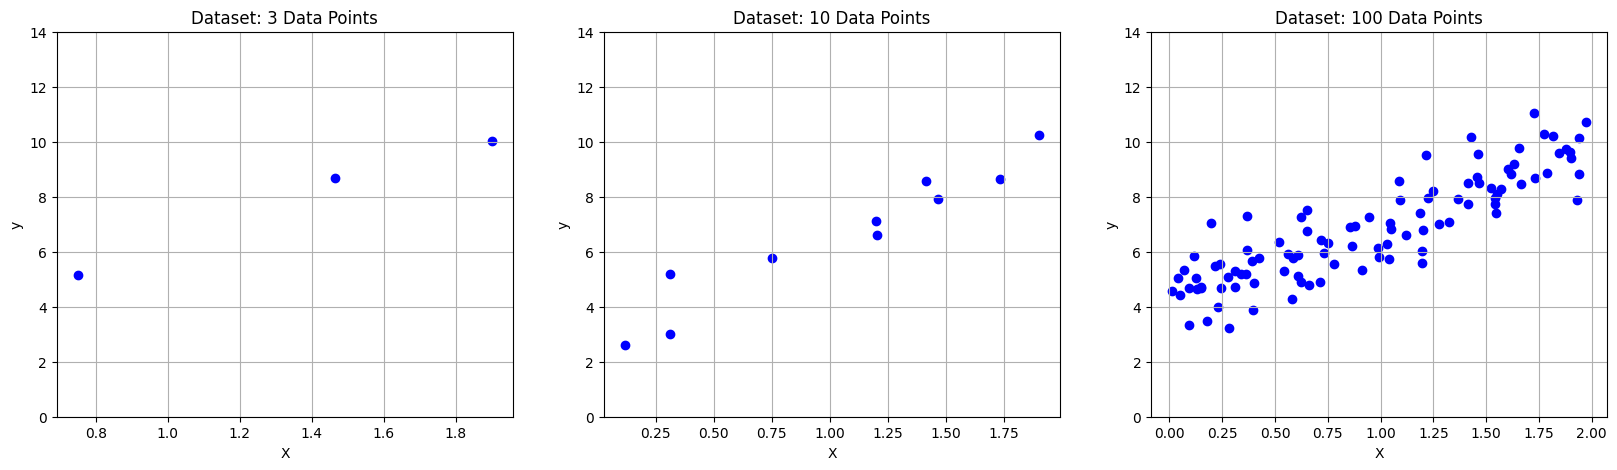

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(m):
    """
    Generates a dataset of matrix X, Target y

    Parameters & Return Variables. 

    Parameter Variables:
    - m: int showcasing the num of instances 
    
    Return Variables:
    - X: the features matrix
    - y: the target vector
    """
    np.random.seed(42) 
    X = 2 * np.random.rand(m, 1)  
    y = 4 + 3 * X + np.random.randn(m, 1)  
    return X, y

def plot_datasets(datasets):
    """    
    Plotting in 3 axes datasets in 1 figure.

    Parameter Variables:
    - datasets: dataset labels and values are tuples of (X, y).
    Return Variables:
    None.
    """
    plt.figure(figsize=(20, 5)) 
    
    for i, (label, (X, y)) in enumerate(datasets.items(), 1):
        plt.subplot(1, len(datasets), i)  
        plt.scatter(X, y, c='blue')  
        plt.title(f"Dataset: {label}") 
        plt.xlabel("X")  
        plt.ylabel("y")  
        plt.grid(True)  
        plt.ylim(0, 14)  
    
    plt.show() 


datasets = {
    '3 Data Points': generate_dataset(3),
    '10 Data Points': generate_dataset(10),
    '100 Data Points': generate_dataset(100)
}

plot_datasets(datasets)


#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

To replicate the figure 20.7 a and b. I followed these steps. 

1 : Create a predictive model with Bayesian Linear Regression

2 : Generate predictions with CI for different std (1-3σ)

3 : Then plot the results for the small dataset of m=3 and then m=10


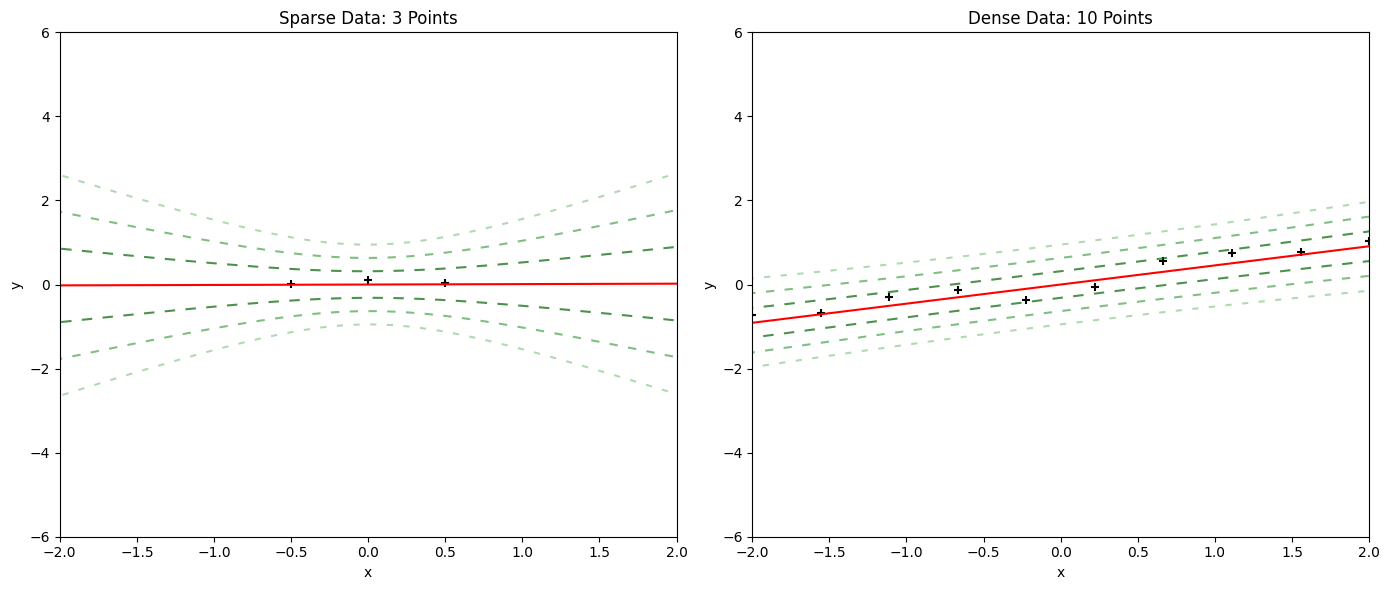

In [49]:
import numpy as np
import matplotlib.pyplot as plt

class BayesianRegression:
    def __init__(self, alpha: float = 1., beta: float = 1.):
        """
        Initializes the Bayesian Regression model.

        Parameters & Return Variables. 

        Parameter Variables:
        - alpha: float, precision parameter of the prior.
        - beta: float, precision parameter of the likelihood.

        Return Variables:
        None.
        """

        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_cov = None

    def fit(self, X, y):
        """
        Fits the Bayesian Regression model using training data.

        Parameters & Return Variables. 

        Parameter Variables:
        - X: np.ndarray, the features matrix of the training data.
        - y: np.ndarray, the target vector of the training data.

        Return Variables:
        None.
        """

        if self.w_mean is None:
            ndim = X.shape[1]
            self.w_mean = np.zeros(ndim)
            self.w_cov = np.linalg.inv(self.alpha * np.eye(ndim))

        precision = np.linalg.inv(self.w_cov) + self.beta * X.T @ X
        self.w_cov = np.linalg.inv(precision)
        self.w_mean = self.w_cov @ (np.linalg.inv(self.w_cov) @ self.w_mean + self.beta * X.T @ y)

    def predict(self, X, return_std=False):
        """
        Predicts the target values using the Bayesian Regression model.

        Parameters & Return Variables. 

        Parameter Variables:
        - X: np.ndarray, the features matrix of the data for prediction.
        - return_std: bool, optional, flag to return standard deviation.
        - sample_size: int, optional, number of samples to draw from the predictive distribution.

        Return Variables:
        - y_mean: np.ndarray, the mean of the predictive distribution.
        - y_std: np.ndarray, optional, the standard deviation of the predictive distribution if return_std is True.
        """     
    
        y_mean = X @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)
            y_std = np.sqrt(y_var)
            return y_mean, y_std
        return y_mean

def generate_data(m, beta):
    """
    Generates a dataset of matrix X, Target y.

    Parameters & Return Variables. 

    Parameter Variables:
    - m: int showcasing the num of instances.
    - beta: float, the precision parameter of the noise.

    Return Variables:
    - X: the features matrix.
    - y: the target vector.
    """

    x_range = (-0.5, 0.5) if m == 3 else (-2, 2)
    x_train = np.linspace(*x_range, m)[:, np.newaxis]
    y_train = 0.5 * x_train.flatten() + np.random.normal(scale=np.sqrt(1 / beta), size=m)
    return x_train, y_train



def plot_predictive_distribution(x_train, y_train, x_test, y_pred, y_std, subplot_title):
    """
    Plots the predictive distribution along with the training data and confidence intervals of varying lengths.

    Parameters & Return Variables. 

    Parameter Variables:
    - x_train: np.ndarray, the features matrix of the training data.
    - y_train: np.ndarray, the target vector of the training data.
    - x_test: np.ndarray, the features matrix for which predictions are made.
    - y_pred: np.ndarray, the predicted mean of the target values.
    - y_std: np.ndarray, the standard deviation of the predictions.
    - subplot_title: str, the title for the subplot.

    Return Variables:
    None.
    """
    plt.plot(x_test, y_pred, color='red')  # Plotting the prediction mean
    plt.scatter(x_train, y_train, color='black', marker='+')  # Plotting the training data

    # Define custom dash patterns for confidence intervals
    dash_styles = [(5, 5), (4, 5), (3, 5)]  # Longer dashes for closer intervals, shorter for farther

    colors = ['darkgreen', 'green', 'green']  
    alphas = [0.7, 0.5, 0.3]  
    for i, (color, alpha, dash_style) in enumerate(zip(colors, alphas, dash_styles), start=1):
        plt.plot(x_test, y_pred + i * y_std, linestyle='--', color=color, alpha=alpha, dashes=dash_style)
        plt.plot(x_test, y_pred - i * y_std, linestyle='--', color=color, alpha=alpha, dashes=dash_style)

    plt.title(subplot_title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-2, 2)
    plt.ylim(-6, 6)



alpha, beta = 1.0, 10.0
bayesian_regression_sparse = BayesianRegression(alpha, beta)
bayesian_regression_dense = BayesianRegression(alpha, beta)

x_train_sparse, y_train_sparse = generate_data(3, beta)
x_train_dense, y_train_dense = generate_data(10, beta)

bayesian_regression_sparse.fit(x_train_sparse, y_train_sparse)
bayesian_regression_dense.fit(x_train_dense, y_train_dense)

x_test = np.linspace(-3, 3, 100)[:, np.newaxis]
y_pred_sparse, y_std_sparse = bayesian_regression_sparse.predict(x_test, return_std=True)
y_pred_dense, y_std_dense = bayesian_regression_dense.predict(x_test, return_std=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_predictive_distribution(x_train_sparse, y_train_sparse, x_test, y_pred_sparse, y_std_sparse, 'Sparse Data: 3 Points')

plt.subplot(1, 2, 2)
plot_predictive_distribution(x_train_dense, y_train_dense, x_test, y_pred_dense, y_std_dense, 'Dense Data: 10 Points')

plt.tight_layout()
plt.show()


### Explanation:

This Bayesian regression model gets better at making guesses as we feed it more data. We tried it out with two different sets of data - a really small one with just 3 points and a bigger one with 10 points. Then we showed off what the model thinks might happen with both datasets through some graphs, focusing on how certain it feels about its predictions.

With the smaller dataset, our model was pretty unsure, which you can tell because its confidence intervals (basically, its "guess range") were pretty wide. When it got more data, it started to get a bit more confident, and those ranges got tighter. The model can predict better with more data set essentially.

The first figure you can see the CI are wider because of the limited data, which generally means it is more uncertain about the regression line. 
The second figure has more data points which you can see the CI are more narrow which indicates the increased in certainty in its predictions.

Basically summing up the Bayesian inference gives us the ability to quantify uncertainty in predictions and how this uncertainty reduces with more observed data.